In [1]:
from random import randint
from shapely.geometry import *
from itertools import permutations
import matplotlib.pyplot as plt
import math



In [2]:
def genPoints():
    num_points = randint(3,15)
    points = []
    for i in range(num_points):
        x = randint(0, 256)
        y = randint(0, 256)
        if (x,y) not in points:
            points.append((x, y))
   # print (points,'\n')
    return points

def join_points(points):
    return list(permutations(points))

In [3]:
def plotPoly(coord):
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'

    xs, ys = zip(*coord) #create lists of x and y values

    plt.figure()
    plt.plot(xs,ys) 
    plt.show()

In [4]:
def checkIntersection(points):
    poly = Polygon(points)
    return poly.is_valid #valid polygons do not intersect

def get_angle(a, b, c):
    #angles should be less than 180
    angle = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return angle + 360 if angle < 0 else angle

def checkConvex(points):
    n = len(points)
    for i in range(len(points)):
        p1 = points[i-2]
        p2 = points[i-1]
        p3 = points[i]
        #angles should be less than 180
        if get_angle(p1, p2, p3) > 180:
            return False
    return True

In [5]:
def fitness_function(polygon):
    isValid=False
    isConvex=False
    
    isValid=checkIntersection(polygon)
    isConvex=checkConvex(polygon)
    
#     print('Valid=',isValid)
#     print('Convex=',isConvex)
    
    if isValid==True and isConvex==True:
        return 0
    elif isValid==True and isConvex==False:
        return 5
    elif isValid==False:
        return 10


In [6]:
def mutation(x):
    mutated = []
    for i in range(len(x)):
        mutated.append('')
        for binary in x[i]:
            ran = randint(0, 2)
            if ran%2 == 0:
                mutated[i] += '1' if binary == '0' else '0'
            else:
                mutated[i] += binary
                
    return mutated

def crossover(parents):
    #print("<====>")
    #print(parents)
    #for i in parents:
    #    print(i)
    
    
    x1 = [bin(i[0])[2:] for i in parents[0]]
    y1 = [bin(i[1])[2:] for i in parents[0]]
    x2 = [bin(i[0])[2:] for i in parents[1]]
    y2 = [bin(i[1])[2:] for i in parents[1]]
    
    #print('x1', x1)
    #print('y1', y1)
    #print('x2', x2)
    #print('y2', y2)
    '''
    split the list into two and perform single point crossover
    '''
    
    temp = x1
    x1 = x1[:len(x1)//2] + x2[len(x2)//2:]
    x2 = x2[:len(x2)//2] + temp[len(temp)//2:]
    
    temp = y1
    y1 = y1[:len(y1)//2] + y2[len(y2)//2:]
    y2 = y2[:len(y2)//2] + temp[len(temp)//2:]
    
    '''
    split the list into two and convert them back to int after mutating random chromosomes
    '''
    x1 = mutation(x1)
    y1 = mutation(y1)
    x2 = mutation(x2)
    y2 = mutation(y2)
    
    #print('x1', x1)
    #print('y1', y1)
    #print('x2', x2)
    #print('y2', y2)
    x1 = [int(i, 2) for i in x1]
    y1 = [int(i, 2) for i in y1]
    x2 = [int(i, 2) for i in x2]
    y2 = [int(i, 2) for i in y2]
    
    parent0 = []
    for i in range(len(x1)):
        parent0.append((x1[i], y1[i]))
        
    parent1 = []
    for i in range(len(x2)):
        parent1.append((x2[i], y2[i]))
        
    return parent0, parent1

In [7]:
def Genetic_Algo(points, generations=100):
    fit_poly = []
    fitness_val = []
    #print(points)
    i=0
    while i < generations:
            fit_poly.append(points[i])
            fitness_val.append(fitness_function(points[i]))

            i+=1
    count=0
    parents=[]
    for i in range(len(fit_poly)):
        if fitness_val[i]==0:
            #break GA / successful
            print("GA SUCCESSFUL")
            #print(i)
            return fit_poly[i], fitness_val[i]
        elif fitness_val[i]>=5:
            parents.append(fit_poly[i])
            if len(parents) == 2:
                children = crossover(parents)
                fit_poly.append(children[0])
                fit_poly.append(children[1])
                fitness_val.append(fitness_function(children[0]))
                fitness_val.append(fitness_function(children[1]))  
#                 newArrival=mutation(children)
#                 points.append(newArrival[0])
#                 points.append(newArrival[1])
                parents = []
            #if count==2
                #call crossover
                #perform mutation
                #drop worst from population (points)
                #count=0
            continue
            

        """
        get a list of polygon by joining random points together and checking their fitness function
        get the polygon with the least fitness function after generations are over
        generations are iteration, start with 1000 random polygons and keep on removing the ones with higher fitness value
        till you get some polygons of same fitness value (either 0 or 5)
        randomly return 1 polygon (roulette)
        #plotPoly([list(elem) for elem in i])
        """
    print("GA COMPLETED")
    randind = randint(0, len(fit_poly))
    return fit_poly[randind], fitness_val[randind]

GA SUCCESSFUL
final answer ([(164, 250), (195, 87), (140, 153)], 0)


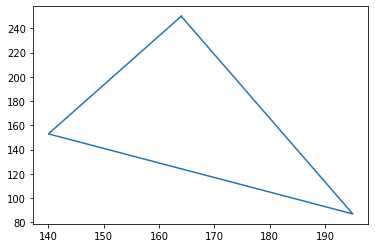

In [8]:
if __name__ == "__main__":
    list_points=[]
    for i in range(0,100):
        list_points.append(genPoints())
    
    x = Genetic_Algo(list_points)
    print("final answer", x)
    plotPoly(x[0])
    
